<a href="https://colab.research.google.com/github/nidaa-hub/HaifaUniv_AI_Lab_2022/blob/main/AI_2022_Lab_5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press ▶ or ctrl+Enter
* ID Submetter1: 316151232
* ID Submetter2: 038163630

התקנות וספריות

In [1]:
#///////////////////////lab 5.2///////////////////////
# importing lybraries and defininig functions
import pandas as pd
import pandas.testing as tm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CRED = '\033[91m'
CGREEN = '\033[92m'
CFLASH = '\033[5m'
CBOLD = '\33[1m'
CITALIC = '\33[3m'
CEND = '\033[0m'

הורידו וקיראו את הדאטה

[link text](https://archive.ics.uci.edu/ml/datasets/glass+identification)


In [2]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
df = pd.read_csv(target_url, header=None)
df.columns = ['', '', '', '', '', '','', '', '', '', 'GlassType']
print('Data File:')
df.head()

Data File:


,,,,,,,,,,,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


התאימו קוד בין 0-ל5 לכל סוג זכוכית אפשרי - ציינו את
ההתפלגות של הדוגמאות לפי כל סוג זכוכית.

<Figure size 720x360 with 0 Axes>

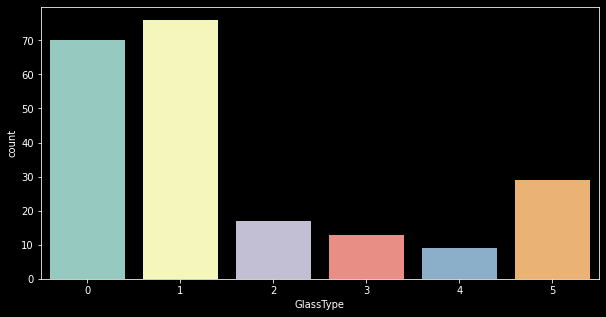

2    76
1    70
7    29
3    17
5    13
6     9
Name: GlassType, dtype: int64

In [3]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
figure, ax = plt.subplots(1,1, figsize=(10,5))
sns.countplot(x = 'GlassType', data=df)
ax.set_xticklabels( ('0','1','2','3','4','5') )
plt.show()
df['GlassType'].value_counts()

חלקו את הדאטה לקבוצת אימון %80 וקבוצת בדיקה %20 

In [12]:
label = df.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(df, label, stratify=label, test_size=0.2, random_state=1)
print("Train part:")
print("Train X:")
print(x_train)
print("Train Y:")
print(y_train)
print("------------------------------")
print("Test part:")
print("Test X:")
print(x_test)
print("Test Y:")
print(y_test)

Train part:
Train X:
                                                                      \
96    97  1.51841  13.02  3.62  1.06  72.34  0.64   9.13  0.00  0.15   
98    99  1.51689  12.67  2.88  1.71  73.21  0.73   8.54  0.00  0.00   
194  195  1.51683  14.56  0.00  1.98  73.29  0.00   8.52  1.57  0.07   
106  107  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28   
209  210  1.51623  14.14  0.00  2.88  72.61  0.08   9.18  1.06  0.00   
..   ...      ...    ...   ...   ...    ...   ...    ...   ...   ...   
99   100  1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00   
124  125  1.52177  13.20  3.68  1.15  72.75  0.54   8.52  0.00  0.00   
208  209  1.51640  14.37  0.00  2.74  72.85  0.00   9.45  0.54  0.00   
153  154  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00   
23    24  1.51751  12.81  3.57  1.35  73.02  0.62   8.59  0.00  0.00   

     GlassType  
96           2  
98           2  
194          7  
106          2  
209          7  
..         .

נרמלו את מאפייני הדאטה להתפלגות נורמלית סטנדרטית (ממוצע
0 וסטית תקן 1) שיהווה קלט לרשת

In [9]:
print("Data before Normalizing : ")
print(df)
normalized = pd.DataFrame((preprocessing.MinMaxScaler()).fit_transform(df))
print("Data after Normalizing : ")
print(normalized)


Data before Normalizing : 
                                                                    GlassType
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0          1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0          1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0          1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0          1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0          1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...        ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0          7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0          7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0          7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0          7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0          7

[214 rows x 11 columns]
Data after N

In [6]:
#don't run this
label = normalized.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(normalized, label, stratify=label, test_size=0.2, random_state=1)
print("Train part:")
print("X:")
print(x_train)
print("Y:")
print(y_train)
print("------------------------------")
print("Test part:")
print("X:")
print(x_test)
print("Y:")
print(y_test)

Train part:
X:
           0         1         2         3         4         5         6   \
96   0.450704  0.318701  0.344361  0.806236  0.239875  0.451786  0.103060   
98   0.460094  0.251975  0.291729  0.641425  0.442368  0.607143  0.117552   
194  0.910798  0.249342  0.575940  0.000000  0.526480  0.621429  0.000000   
106  0.497653  0.882353  0.000000  0.000000  0.563863  0.000000  0.093398   
209  0.981221  0.223003  0.512782  0.000000  0.806854  0.500000  0.012882   
..        ...       ...       ...       ...       ...       ...       ...   
99   0.464789  0.305531  0.335338  0.659243  0.355140  0.555357  0.096618   
124  0.582160  0.466198  0.371429  0.819599  0.267913  0.525000  0.086957   
208  0.976526  0.230465  0.547368  0.000000  0.763240  0.542857  0.000000   
153  0.718310  0.217296  0.404511  0.757238  0.289720  0.514286  0.095008   
23   0.107981  0.279192  0.312782  0.795100  0.330218  0.573214  0.099839   

           7         8         9         10  
96   0.343866 

 FULLY
CONNECTED בעלת קישוריות מלאה MLP יצרו רשת נוירונים פשוטה 

(logits)  דו-שכבתית המקבלת קלטים של 9 המאפיינים מסווגת אותם ומוציאה שישה פלטים 

In [7]:
from sklearn import neural_network
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import numpy as np
mlp = neural_network.MLPClassifier(max_iter=50000,hidden_layer_sizes=(9,6))

 SOFTMAX את ששת הפלטים יש לאגד לפונקצית הסתברות באמצעות
 פונקצית

In [13]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


print(mlp)
mlp.fit(x_train,y_train)
print(mlp.predict_proba(x_test[:1]))
print(softmax(mlp.predict_proba(x_test[:1])))
print(mlp.predict(x_test))
#print(y_test)
#print(mlp.score(x_test, y_test))
#Predict
y_pred = mlp.predict(x_test)
#y_pred = softmax(x_pred)

#x_pred = mlp.predict_proba(x_test[:1])
#y_pred = softmax(x_pred)

#Score
acu = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
print(CGREEN + "Confusion matrix:\n",cm)

print(CBOLD + "\n Accuracy of ANN:",acu)
print("\n"+ CEND)
print(classification_report(y_test, y_pred))

MLPClassifier(hidden_layer_sizes=(9, 6), max_iter=50000)
[[6.74204405e-02 9.29601016e-01 1.25804748e-05 2.96595305e-03
  9.71312262e-09 3.53185420e-17]]
[[1. 1. 1. 1. 1. 1.]]
[2. 2. 2. 2. 7. 1. 2. 5. 1. 1. 3. 1. 1. 2. 1. 5. 2. 2. 5. 1. 7. 3. 7. 7.
 1. 1. 2. 7. 6. 1. 7. 1. 2. 2. 1. 1. 2. 1. 2. 2. 6. 3. 2.]
Confusion matrix:
 [[14  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]

 Accuracy of ANN: 1.0


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00 

הרחיבו והתאימו את המנוע הגנטי שלכם לפי העקרונות שתוארו בהרצאה כדי לייצר רשתות נוירונים עמוקות

In [14]:
#from the Lecture:

import random
import numpy as np
from IPython.display import clear_output

# sigmoid and ReLU function
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return x * ( x > 0)

In [15]:
#the genitic algorithm from the lecture modified 

class genetic_algorithm:
    def execute(pop_size,generations,threshold,x,y,network):
        class Agent:
            def __init__(self,network):
                class neural_network:
                    def __init__(self,network):
                        self.depth = []
                        self.weights = []
                        self.activations = []
                        for layer in network:
                            if layer[0]!= None:
                                input_size=layer[0]
                            else:
                                input_size=network[network.index(layer)-1][1]
                            output_size = layer[1]
                            activation = layer[2]
                            self.weights.append(np.random.randn(input_size,output_size))
                            self.activations.append(activation)
                    def propagate(self,data):
                        input_data = data
                        for i in range(len(self.weights)):
                            z=np.dot(input_data,self.weights[i])
                            a=self.activations[i](z)
                            input_data=a
                        yhat=a
                        return yhat
                self.neural_network = neural_network(network)
                self.fitness = 0
            def __str__(self):
                    return 'Loss: ' + str(self.fitness[0])

        def generate_agents(population, network):

            return [Agent(network) for _ in range(population)]

        def fitness(agents,x,y):
            for agent in agents:
                yhat = agent.neural_network.propagate(x)
                cost = (yhat-y)**2
                agent.fitness=sum(cost)
            return agents

        def selection(agents):
            agents = sorted(agents, key=lambda agent: agent.fitness,reverse=False)
            print('\n'.join(map(str,agents)))
            agents = agents[:int(0.2 * len(agents))]
            return agents

        def unflatten(flattened,shapes):
            newarray = []
            index = 0
            for shape in shapes:
                size = np.product(shape)
                newarray.append(flattened[index : index + size].reshape(shape))
                index += size
            return newarray

        def crossover(agents,network,pop_size):
            offspring=[]
            for _ in range((pop_size- len(agents)) // 2):
                parent1 = random.choice(agents)
                parent2 = random.choice(agents)
                child1 = Agent(network)
                child2 = Agent(network)

                shapes = [a.shape for a in parent1.neural_network.weights]
                genes1 = np.concatenate([a.flatten() for a in parent1.neural_network.weights])
                genes2 = np.concatenate([a.flatten() for a in parent2.neural_network.weights])

                split = random.randint(0, len(genes1)-1)
                child1_genes = np.array(genes1[0:split].tolist() + genes2[split:].tolist())
                child2_genes = np.array(genes1[0:split].tolist() + genes2[split:].tolist())

                child1.neural_network.weights = unflatten(child1_genes, shapes)
                child2.neural_network.weights = unflatten(child2_genes, shapes)
                offspring.append(child1)
                offspring.append(child2)
            agents.extend(offspring)
            return agents


        def mutation(agents):
            for agent in agents:
                if random.uniform(0.0,1.0) <= 0.1:
                    weights = agent.neural_network.weights
                    shapes = [a.shape for a in weights]
                    flattened = np.concatenate([a.flatten() for a in weights])
                    randint = random.randint(0,len(flattened)-1)
                    flattened[randint] = np.random.randn()
                    newarray = []
                    indeweights = 0
                    for shape in shapes:
                        size=np.product(shape)
                        newarray.append(flattened[indeweights : indeweights + size].reshape(shape))
                        indeweights += size
                    agent.neural_network.weights = newarray
                    return agents
    


        for i in range(generations):
            print('Generation',str(i),':')
            agents = generate_agents(pop_size,network)
            agents = fitness(agents,x,y)
            agents = selection(agents)
            agents = crossover(agents,network,pop_size)
            agents = mutation(agents)
            agents = fitness(agents,x,y)

            if any(agent.fitness < threshold for agent in agents):
                print('Threshold met at generation' + str(i) + '!')
            if i % 100:
                clear_output()

        return agents[0]

In [16]:
#trying to run the code from the lecture:

x = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
y = np.array([[0,1,1,0]]).T

p = random.randint(0, 1)
if p == 0:
    activ = ReLU
else:
    activ = sigmoid

network = [[3,10,activ],[None,1,activ]]
#x = np.array(x_train)
#y = np.array(y_train[:, np.newaxis])
#network = [[11,10,activ],[None,6,activ]]
ga = genetic_algorithm
agent = ga.execute(100,100,0.1,x,y,network)
weights = agent.neural_network.weights
print(agent.fitness)
agent.neural_network.propagate(x)

[0.15416681]


array([[ 0.12986551],
       [ 0.62976884],
       [ 0.98481313],
       [-0.        ]])

In [17]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
%%writefile glass.csv
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1
13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
19,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00,1
20,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
21,1.51750,12.82,3.55,1.49,72.75,0.54,8.52,0.00,0.19,1
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
23,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.00,1
24,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1
25,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00,1
26,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00,1
27,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.00,1
28,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1
29,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
30,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.00,0.00,1
31,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1
32,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,1
33,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
34,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,1
35,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1
36,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,1
37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
38,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
41,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,1
42,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00,1
43,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,1
44,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1
45,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1
46,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00,1
47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
48,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
49,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
50,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
52,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1
54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
55,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09,1
56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
58,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.00,1
59,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.00,1
60,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1
61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1
62,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
63,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1
64,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.00,0.00,1
65,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1
66,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1
67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
72,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
73,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
74,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
75,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00,2
76,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
77,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2
78,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.00,0.00,2
79,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2
80,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2
81,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.00,0.00,2
82,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2
83,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2
84,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2
86,1.51625,13.36,3.58,1.49,72.72,0.45,8.21,0.00,0.00,2
87,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2
88,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10,2
89,1.51618,13.01,3.50,1.48,72.89,0.60,8.12,0.00,0.00,2
90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,2
92,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,0.00,0.00,2
93,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19,2
94,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2
95,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2
96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
97,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
98,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
99,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2
100,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
101,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
102,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00,2
103,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.20,2
104,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
105,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2
106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
109,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
113,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
114,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
115,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.00,0.00,2
116,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.00,0.00,2
117,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10,2
118,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
119,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
120,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.00,0.00,2
121,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
122,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.00,0.21,2
123,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.00,0.00,2
124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
125,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2
126,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12,2
127,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00,2
128,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
129,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
130,1.52020,13.98,1.35,1.63,71.76,0.39,10.56,0.00,0.18,2
131,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00,2
132,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
133,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2
134,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
135,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.00,0.00,2
136,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28,2
137,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2
138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
139,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00,2
140,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2
141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
147,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.00,0.00,3
148,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.00,0.00,3
149,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10,3
150,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.00,0.00,3
151,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3
152,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,3
154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
155,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.00,0.00,3
156,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00,3
157,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00,3
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,3
159,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,3
160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,3
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
165,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5
167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
168,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,5
169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5
175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5
176,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.00,0.28,5
177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
178,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00,6
179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00,6
180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6
181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
189,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
191,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
192,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
194,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
197,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
198,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
199,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
200,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7
201,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
202,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7
203,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
204,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
205,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7
206,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7


Overwriting glass.csv


In [20]:
#trying with a different code : works but we coudn't get sigmoid activation to run instead of tanh

import sys
from copy import deepcopy, copy
POPSIZE = 8
Iterations = 9
ELITRATE = 0.1

# sigmoid and ReLU function
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return x * ( x > 0)

class DS:


    def retrieveDataset(self):
        f = open('glass.csv', 'r')
        #f = df.read().decode()

        nn_input = []
        nn_output = []

        for line in f:
            elements = line.split(',')
            df.columns = ['', '', '', '', '', '','', '', '', '', 'GlassType']
            elements = df.columns
            nn_input.append([float(x) for x in elements[1:-1]])
            dict = {1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5}
            nn_output.append(dict[int(elements[-1][0])])

        return nn_input, nn_output

    def divideDataset(self, nn_input, nn_output):

        classes = [[], [], [], [], [], []]

        train_input, train_output, test_input, test_output = [], [], [], []

        for i in range(len(nn_input)):
            classes[nn_output[i]].append(nn_input[i])

        for i in range(6):

            test_size = int(0.2 * len(classes[i]))
            for j in range(test_size):
                test_input.append(classes[i][j])
                test_output.append(i)

            for j in range(test_size + 1, len(classes[i])):
                train_input.append(classes[i][j])
                train_output.append(i)

        return train_input, train_output, test_input, test_output

    def normalizeDataset(self, nn_input):

        for j in range(9):
            f_min, f_max = 100.0, 0.00
            f_max = max(nn_input[:][j])

            for i in range(len(nn_input)):
                f_min = min(f_min, nn_input[i][j])
                f_max = max(f_max, nn_input[i][j])

            for i in range(len(nn_input)):
                nn_input[i][j] = (nn_input[i][j] - f_min) / (f_max - f_min)

        return nn_input

    def preprocessData(self):
        nn_input, nn_output = self.retrieveDataset()
        nn_input = self.normalizeDataset(nn_input)
        train_input, train_output, test_input, test_output = self.divideDataset(nn_input, nn_output)
        return train_input, train_output, test_input, test_output


class Network:

    def __init__(self, depth, hidden, activation):
        self.depth = depth
        self.hidden = hidden
        self.activation = activation


class GeneticStruct:

    def __init__(self, network, fitness, reg):
        self.network = network
        self.fitness = fitness
        self.reg = reg


class InitPop:

    def initPopulation(self):

        population = []

        for i in range(POPSIZE):
            l = []
            r = random.randrange(1, 10)
            depth = r
            for i in range(depth):
                tmp = random.randrange(2, 200)
                l.append(tmp)

            prob = random.randint(0, 1)
            if prob == 0:
                activation = 'relu'
            else:
                activation = 'tanh'

            fitness = np.inf
            curr_network = Network(depth, l, activation)

            agents = GeneticStruct(curr_network, fitness, 0)
            population.append(agents)

        return population


    def calculateReg(self, cls, agents):

        c = 1
        l = 0.5

        weights = cls.coefs_
        length = len(weights)
        weight_sum = 0

        for i in range(length):
            helper = len(weights[i])

            for j in range(helper):
                print(weights[i][j])
                curr = weights[i][j] ** 2
                weight_sum = weight_sum + curr


        depth = agents.network.depth

        for k in range(depth):
            d = agents.network.hidden[k]
            c = c * d

        c = c * 54
        x1 = weight_sum * l
        x2 = len(x_train) * 2
        reg = x1 / x2 / c

        return reg


    def calcFitnessOneItr(self, agents):
        h = agents.network.hidden
        itr = 3000
        a = agents.network.activation
        s = 'adam'

        reg = 0

        cls = neural_network.MLPClassifier(hidden_layer_sizes=h, max_iter=itr, activation=a, solver=s, random_state=1)

        cls.fit(x_train, y_train)
        predictionY = cls.predict(x_test)

        confusion = confusion_matrix(predictionY, y_test)
        overall_sum = confusion.sum()
        d_sum = confusion.trace()

        agents.fitness = d_sum / overall_sum


        #reg = self.calculateReg(cls, agents)
        agents.reg = reg

        return agents




    def calculateFittnes(self, population):

        for i in range(len(population)):
            population[i] = self.calcFitnessOneItr(population[i])

        return population


    def sortFitness(self, population):

        population.sort(key=lambda x: - x.fitness)

        return population

    def elitism(self, population: list, buffer: list, esize):

        temp = population[:esize].copy()
        buffer[:esize] = temp

        return buffer

    def mate(self, population, buffer):

        esize = int(POPSIZE * ELITRATE)
        buffer = self.elitism(population, buffer, esize)

        # mate the rest
        for i in range(esize, POPSIZE):
            i1 = random.randrange(0, POPSIZE - 1)
            i2 = random.randrange(0, POPSIZE - 1)
            print(len(population))
            print(i1)
            print(i2)

            pop1 = population[i1]
            pop2 = population[i2]

            index1 = random.randrange(0, pop1.network.depth)
            index2 = random.randrange(0, pop2.network.depth)

            buffer[i].network.hidden = pop1.network.hidden[:index1] + pop2.network.hidden[index1:index2] + pop1.network.hidden[index2:]
            buffer[i].network.depth = len(buffer[i].network.hidden)

            p = random.randrange(0, 100)

        return buffer

    def GA(self):

        population = self.initPopulation()
        buffer = population.copy()

        best_solution = copy(population[0])
        best_fitness = -sys.maxsize - 1

        for i in range(Iterations):
            population = self.calculateFittnes(population)

            population = self.sortFitness(population)

            if population[0].fitness > best_fitness:
                best_solution = population[0]
                best_fitness = population[0].fitness

            print(CGREEN + "Best Solution so far:" + CEND)

            print(best_fitness)


            population = self.mate(population, buffer)

        print()


        print(CGREEN + "Best Solution overall:" + CEND)
        print(CGREEN + "Best Solution accuracy:" + CEND)
        print(best_fitness)

        print(CGREEN + 'Best Solution depth: ' + CEND, best_solution.network.depth)
        print(CGREEN + 'Best Solution layers: ' + CEND, best_solution.network.hidden)
        print(CGREEN + 'Best Solution activation: ' + CEND, best_solution.network.activation)



In [21]:
print("Genetic:")
data_set = DS()
K = InitPop()
ga = K.GA()

Genetic:
Best Solution so far:
1.0
8
5
5
8
3
4
8
6
2
8
0
6
8
5
2
8
3
0
8
0
2
8
2
5
Best Solution so far:
1.0
8
5
1
8
3
3
8
2
5
8
4
0
8
1
0
8
0
2
8
2
4
8
2
4
Best Solution so far:
1.0
8
0
2
8
2
1
8
0
6
8
1
4
8
1
3
8
1
6
8
6
5
8
2
2
Best Solution so far:
1.0
8
5
2
8
1
0
8
4
4
8
0
2
8
5
0
8
0
1
8
0
6
8
5
0
Best Solution so far:
1.0
8
3
1
8
3
6
8
0
3
8
4
1
8
0
2
8
0
3
8
5
4
8
2
4
Best Solution so far:
1.0
8
4
2
8
2
6
8
5
5
8
3
6
8
2
4
8
2
3
8
2
3
8
1
0
Best Solution so far:
1.0
8
4
5
8
0
1
8
4
5
8
2
5
8
3
0
8
5
6
8
3
4
8
3
1
Best Solution so far:
1.0
8
1
4
8
1
5
8
0
4
8
6
3
8
1
1
8
0
1
8
4
3
8
6
6
Best Solution so far:
1.0
8
1
0
8
6
1
8
4
5
8
2
3
8
5
2
8
2
0
8
0
5
8
6
2

Best Solution overall:
Best Solution accuracy:
1.0
Best Solution depth:  72
Best Solution layers:  [141, 197, 131, 183, 197, 131, 141, 197, 131, 183, 197, 131, 141, 197, 131, 141, 197, 131, 183, 197, 131, 183, 197, 141, 197, 197, 131, 141, 197, 131, 183, 197, 131, 183, 131, 183, 197, 141, 197, 197, 131, 141, 197, 131, 183,